# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 





### Откройте файл с данными и изучите общую информацию. 

In [58]:
# открытие файла с данными
import pandas as pd
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [59]:
# вывод общей информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [60]:
# поиск явных дубликатов
data.duplicated().sum()

0

Text(0, 0.5, 'Количество')

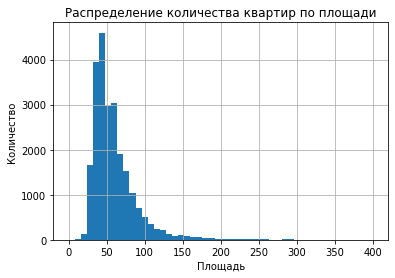

In [61]:
# построения графика "Распределение количества квартир по площади"
ax = data['total_area'].plot(kind='hist',  
                             range = (0,400),  
                             bins=50, 
                             title = 'Распределение количества квартир по площади', 
                             grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Количество')

Text(0, 0.5, 'Количество')

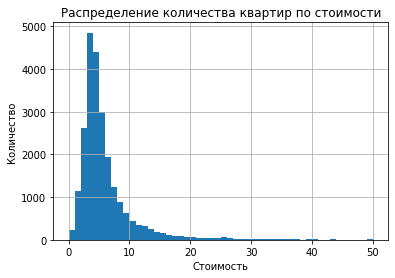

In [62]:
# построения графика 'Распределение количества квартир по стоимости'. Для построение стоимость округлил до миллионов
ax = (data['last_price']/1000000).plot(kind='hist',  
                             range = (0,50),  
                             bins=50, 
                             title = 'Распределение количества квартир по стоимости', 
                             grid=True)
ax.set_xlabel('Стоимость')
ax.set_ylabel('Количество')

Text(0, 0.5, 'Количество')

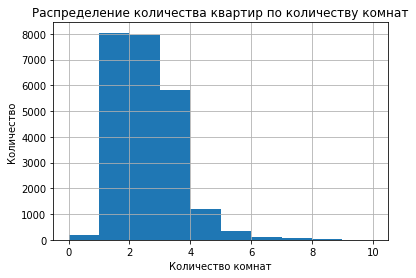

In [63]:
# построения графика 'Распределение количества квартир по количеству комнат'.
ax = (data['rooms']).plot(kind='hist',  
                             range = (0,10),  
                             bins=10, 
                             title = 'Распределение количества квартир по количеству комнат', 
                             grid=True)
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Количество')

Text(0, 0.5, 'Количество')

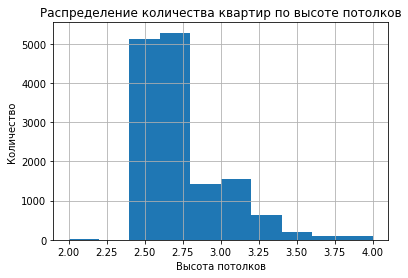

In [64]:
# построения графика 'Распределение количества квартир по высоте потолков'.
ax = (data['ceiling_height']).plot(kind='hist',  
                             range = (2,4),  
                             bins=10, 
                             title = 'Распределение количества квартир по высоте потолков', 
                             grid=True)
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Количество')

Text(0, 0.5, 'Количество')

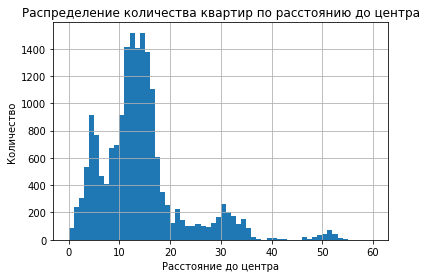

In [65]:
# построения графика 'Распределение количества квартир по расстоянию до центра'.
ax = (data['cityCenters_nearest']/1000).plot(kind='hist',  
                             range = (0,60),  
                             bins=60, 
                             title = 'Распределение количества квартир по расстоянию до центра', 
                             grid=True)
ax.set_xlabel('Расстояние до центра')
ax.set_ylabel('Количество')

В файле 23699 строк, из них:
* большенство столбцов имеют пропуски; 
* некоторые столбцы имеют неверный формат; 
* явные дубликаты отсутствуют.

Графики основых столбцов необходимых для дальнейшего исследования показывают корректное распределение. 

За исключением:
* столбца rooms по которому видны квартиру с 0 в количестве комнат, что невозможно. Потребуются дальнейшие исследования;
* и столбца cityCenters_nearest котрый показывает несколько заметных пиков, но это можно списать на неравномерность застройки города.

### Предобработка данных

#### Обработка пропусков

       count    max        mean  median    min
rooms                                         
0        197  371.0   29.279746   26.05   15.5
1       8047  494.1   37.644669   36.56   12.0
2       7940  196.0   55.855089   53.00   20.0
3       5814  363.1   77.764580   73.00   40.1
4       1180  500.0  107.610763   99.30   42.0
5        326  507.0  161.474816  146.45   40.0
6        105  500.0  201.537619  184.30   87.0
7         59  631.2  265.325424  214.00  100.6
8         12  373.1  259.233333  235.70  150.0
9          8  400.0  305.975000  300.95  235.0
10         3  290.0  259.566667  272.60  216.1
11         2  194.1  188.900000  188.90  183.7
12         1  900.0  900.000000  900.00  900.0
14         2  363.0  304.200000  304.20  245.4
15         1  590.0  590.000000  590.00  590.0
16         1  270.0  270.000000  270.00  270.0
19         1  374.6  374.600000  374.60  374.6


Text(0, 0.5, 'Кол-во квартир')

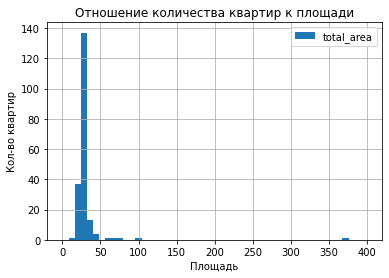

In [66]:
# заменяем пропущенные значение в количестве комнат 0
data['rooms'] = data['rooms'].fillna(0)

# строим сводную таблиццу площади по количеству комнат
print(data.pivot_table(index = 'rooms', values = 'total_area', aggfunc = ('count', 'median', 'mean', 'max', 'min')))

#строим график площади квартир с 0 количеством комнат
ax = data.loc[data['rooms'] == 0].plot(kind='hist', y = 'total_area', range = (0,400),  bins=50, title = 'Отношение количества квартир к площади', grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Кол-во квартир')

In [67]:
# Для квартир с площадью менее 50 кв.м пропущенные значения меняем на 1  
data.loc[(data['rooms'] == 0) & (data['total_area'] <50), 'rooms'] = 1 

# пропущенные значения наличия балконов ставим 0 (нет балкона)
data['balcony'] = data['balcony'].fillna(0) 
data['balcony'] = data['balcony'].astype(bool)

# пропущенные значения апартаментах ставим 0 (не аппартаменты)
data['is_apartment'] = data['is_apartment'].fillna(0) 
data['is_apartment'] = data['is_apartment'].astype(bool) 

# пропущенные значения в количестве прудов ставим 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) 

# пропущенные значения в количестве парков ставим 0
data['parks_around3000'] = data['parks_around3000'].fillna(0) 

# пропущенные значения в этажности здания, заполним этажем квартиры. 
data['floors_total'] = data['floors_total'].fillna(data['floor'])

# пропущенные значения высоты потолков заменяем медианным для каждой группы квартир по количеству комнат
data['ceiling_height'] = data['ceiling_height'].fillna(0) 
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['ceiling_height'] == 0), 'ceiling_height'] = \
    data.loc[(data['rooms'] == t), 'ceiling_height'].median()

# пропущенные значения в площади кухни заполним медианным значеним для каждой группы по количеству комнат
data['kitchen_area'] = data['kitchen_area'].fillna(0) 
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'] == 0), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()

# пропущенные значения в желой площади заполним медианным значеним для каждой группы по количеству комнат
data['living_area'] = data['living_area'].fillna(0) 
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'] == 0), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()   
    
#data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Выявлены и заполнены следующие пропуски в столбцах:
* В столбце "rooms" 197 пропусков. По графику и сводной таблице видно, что большая часть квартир с пропущенным количеством комнат площадью менее 50 кв.м. Логично предположить, что с такой площадь 1 комнатные квартиры. Выяснить количество комнат в квартирах с площадью от 50 до 120 кв.м и от 350 до 372 кв.м не представляется возможным.

* Пропущенные значения в столбце ceiling_height допустипо заменить медианным значением для каждой группы квартир по количеству комнат, так как можно логично предположить, что дома построены в соответствии со строительными нормативами и не могут значительно отличаться от медианного значения.

* Пропущенные значения в столбе balcony логично запонить 0, так как продавец при наличии в квартире балкона обязательно указал бы это в объявлении как одно из преимуществ.

* Пропущенные значения в столбе is_apartment логично запонить 0, так как вероятность того, что продавец не заполнил настолько важный параметр объявления крайне мала.

* Пропущенные значения в столбцах living_area  и kitchen_area заполнил медианными значениями для квартир соответствующего количества комнат.

* Предположим, что продавец не заполнил графу этажности, приняв ее за этаж квартиры и заполним пропуски в столбце floors_total этажем квартиры из столбца floor.


Пропуски в остальных столбцах заполнить невозможно, так как от других параметров они не зависят. Да и на дальнейшее исследование не повлияют.

In [68]:

#преобразование цены на момент снятия с публикации
data['last_price'] = data['last_price'].astype(int)
data['last_price'] = data['last_price'] / 1000

#преобразование общей площади
data['total_area'] = data['total_area'].astype(int) 

#преобразование жилой плащади
data['living_area'] = data['living_area'].astype(int) 

#преобразование плащади кухни
data['kitchen_area'] = data['kitchen_area'].astype(int)

#преобразование количество прудов
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

#преобразование количество парков
data['floors_total'] = data['floors_total'].astype(int)

#преобразование этажности здания
data['parks_around3000'] = data['parks_around3000'].astype(int)


#преобразование даты публикации и добавление данных: день, месяц, год публикации
data['first_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']) #
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  int64         
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int64         
 13  balcony         

Преобразованы типы данных в соответствии с содержимым столбцов:
* last_price - цена на момент снятия с публикации, так же произведено округление до 1000. Для дальнейших рассчетов такой точности достаточно.
* total_area - общая площадь
* living_area - жилая площадь
* kitchen_area - площадь кухни
* ponds_around3000 - количество прудов ближе 3км.
* floors_total - этажность здания
* parks_around3000 - количество парков ближе 3км.

Добавлены столбцы: день, месяц, год публикации.

#### Обработка дубликатов

In [69]:
#замена пропущенных значений на "Неизвестный адрес"
data['locality_name'] = data['locality_name'].fillna("Неизвестный адрес") 

# вывод уникальных значений в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [70]:
#подсчет количества объявлений в каждом населенном пункте
data.groupby('locality_name')['last_price'].agg('count') 

locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: last_price, Length: 365, dtype: int64

Видно, что названия населенных пунктов написаны с заглавной буквы, тогка как тип с строчной

In [71]:
#процедура очистки названий населенных пунктов от названий типов "город", 'поселок' и т.д.
# удаляются все слова начинающиеся с строчной буквы
def clear_list(list): 
    new_list = []
    p = 0
    for p in range(len(list)):
        if list[p].islower() == False:
            new_list.append(list[p])
            new_str = " ".join(new_list)
    #print(new_str)
    return new_str  

data['new_locality_name'] = data['locality_name'].str.split()
data['new_locality_name'] = data['new_locality_name'].apply(clear_list)

# замена буквы 'ё' на 'е'
data['new_locality_name'] = data['new_locality_name'].str.replace('ё', 'е',case = None)

# вывод количества объявлений в каждом населенном пункте
data.groupby('new_locality_name')['last_price'].agg('count')              

new_locality_name
Агалатово           4
Александровская     2
Алексеевка          1
Аннино             16
Аро                 3
                   ..
Юкки                5
Ялгино              1
Яльгелево           6
Ям-Тесово           2
Янино-1            68
Name: last_price, Length: 306, dtype: int64

Удалены названия типов населенных пунктов и произведена замена букв ё на е. Удалось избавиться от 59 неявных дубликатов населенных пунктов. Конечно данный метод не сработает при наличии населенных пунктов разного типа но с одним названием. Но так как данная ситуация маловероятна, ей можно принибречь. И для на дальнейшее исследование не влияет.

### Посчитайте и добавьте в таблицу новые столбцы

In [72]:
# рассчет стоимости квадратного метра
try:  
    data['m2_price'] = data['last_price'] / data['total_area']
except:
    print("Не заполена площадь квартиры")  
data['m2_price'] = data['m2_price'].astype('int64')
data['floors_total'] = data[data['floors_total'].notnull()]['floors_total'].astype('int')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,new_locality_name,m2_price
0,20,13000.0,108,2019-03-07,3,2.70,16,51,8,False,...,1,482.0,2,755.0,NaN,3,3,2019,Санкт-Петербург,120
1,7,3350.0,40,2018-12-04,1,2.50,11,18,1,False,...,0,NaN,0,NaN,81.0,1,12,2018,Шушары,83
2,10,5196.0,56,2015-08-20,2,2.50,5,34,4,False,...,1,90.0,2,574.0,558.0,3,8,2015,Санкт-Петербург,92
3,0,64900.0,159,2015-07-24,3,2.50,14,44,9,False,...,2,84.0,3,234.0,424.0,4,7,2015,Санкт-Петербург,408
4,2,10000.0,100,2018-06-19,2,3.03,14,32,13,False,...,2,112.0,1,48.0,121.0,1,6,2018,Санкт-Петербург,100
5,10,2890.0,30,2018-09-10,1,2.50,12,14,5,False,...,0,NaN,0,NaN,55.0,0,9,2018,Янино-1,96
6,6,3700.0,37,2017-11-02,1,2.50,26,10,6,False,...,0,NaN,0,NaN,155.0,3,11,2017,Парголово,100
7,5,7915.0,71,2019-04-18,2,2.50,24,30,22,False,...,0,NaN,0,NaN,NaN,3,4,2019,Санкт-Петербург,111
8,20,2900.0,33,2018-05-23,1,2.50,27,15,26,False,...,0,NaN,0,NaN,189.0,2,5,2018,Мурино,87
9,18,5400.0,61,2017-02-26,3,2.50,9,43,7,False,...,0,NaN,0,NaN,289.0,6,2,2017,Санкт-Петербург,88


In [73]:
# классификаия этажей
data['first_floor'] = (data['floor'] == 1) *1  
data['last_floor'] = (data['floor'] == data['floors_total']) *1
data['other_floor'] = ((data['last_floor'] == 0) & (data['first_floor'] == 0)) *1
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,day,month,year,new_locality_name,m2_price,first_floor,last_floor,other_floor
0,20,13000.0,108,2019-03-07,3,2.70,16,51,8,False,...,755.0,NaN,3,3,2019,Санкт-Петербург,120,0,0,1
1,7,3350.0,40,2018-12-04,1,2.50,11,18,1,False,...,NaN,81.0,1,12,2018,Шушары,83,1,0,0
2,10,5196.0,56,2015-08-20,2,2.50,5,34,4,False,...,574.0,558.0,3,8,2015,Санкт-Петербург,92,0,0,1
3,0,64900.0,159,2015-07-24,3,2.50,14,44,9,False,...,234.0,424.0,4,7,2015,Санкт-Петербург,408,0,0,1
4,2,10000.0,100,2018-06-19,2,3.03,14,32,13,False,...,48.0,121.0,1,6,2018,Санкт-Петербург,100,0,0,1


In [74]:
# добавление столбца с расстоянием до центра города в км. с окргдением до целых.
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round() 

Добавлен столбец со стоимостью 1 кв. метра. Данные преобразованы в целочисленные. Точности до целых для дальнейшего исследования бедет достаточно.

Выполнена категоризация квартир по высоте этажа (Первый, Последний, Другой).

Добавлен и округлен до целых значений столбец с расстонием до центра города в км. 

### Проведите исследовательский анализ данных

#### Изучение данных

In [75]:
# вывод статистических данных
data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'year','month', 'day']].describe().round(2)

,total_area,last_price,rooms,ceiling_height,year,month,day
count,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00
mean,60.12,6541.55,2.08,2.67,2017.37,6.40,2.57
std,35.67,10887.01,1.07,1.00,1.04,3.49,1.79
min,12.00,12.19,0.00,0.00,2014.00,1.00,0.00
25%,40.00,3400.00,1.00,2.50,2017.00,3.00,1.00
50%,52.00,4650.00,2.00,2.50,2017.00,6.00,3.00
75%,69.00,6800.00,3.00,2.70,2018.00,10.00,4.00
max,900.00,763000.00,19.00,100.00,2019.00,12.00,6.00


In [76]:
# рассчет квантилий. Далее аналогично
data['total_area'].quantile(0.05), data['total_area'].quantile(0.95)

(31.0, 116.0)

Text(0, 0.5, 'Кол-во')

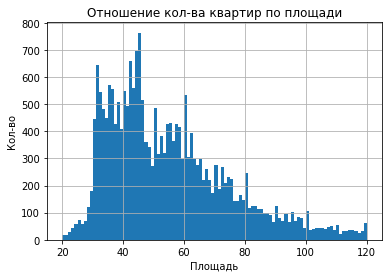

In [77]:
# построение графика
ax = data['total_area'].plot(
    kind='hist', 
    bins=100, 
    range=(20,120), 
    title='Отношение кол-ва квартир по площади', 
    grid=True
)
ax.set_xlabel('Площадь')
ax.set_ylabel('Кол-во')

Больше всего квартир площадью 45 кв.м, не многим меньше площадью 30 кв. м. Так же есть небольгие подъемы в количестве квартир площадью 55-65 кв.м. Но их все равно значительно меньше чем квартир площадью 45 кв.м. Вероятно на данных значениях площади проходит переход между квартирами с разным количеством комнат.

In [78]:
data['last_price'].quantile(0.05), data['last_price'].quantile(0.95)

(1870.0, 15300.0)

Text(0, 0.5, 'Кол-во')

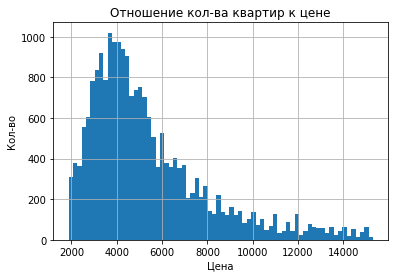

In [79]:

ax = data['last_price'].plot(
    kind='hist', 
    bins=70, 
    range=(1870,15300), 
    title='Отношение кол-ва квартир к цене', 
    grid=True)
ax.set_xlabel('Цена')
ax.set_ylabel('Кол-во')

Наибольшее количество предложений в районе 3,5-4,5 млн. руб. Так же наблюдаются не значительные возвышения в других областях, вероятно связанные с увеличением кол-ва комнат.

In [80]:
data['total_area'].quantile(0.05), data['total_area'].quantile(0.95)

(31.0, 116.0)

Text(0, 0.5, 'Кол-во квартир')

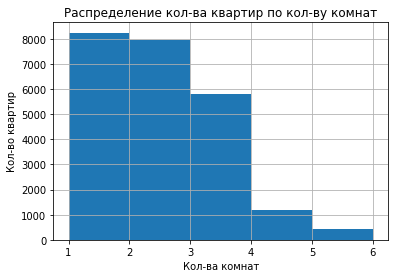

In [81]:
ax = data['rooms'].plot(
    kind='hist',
    bins=5,
    range=(1,6),
    title='Распределение кол-ва квартир по кол-ву комнат',
    grid=True
)
ax.set_xlabel('Кол-ва комнат')
ax.set_ylabel('Кол-во квартир')

Больше всего однокомнатных квартир, как самых популярных и бюджетных. Предложение падает вместе с увеличиением кол-ва комнат.

Text(0, 0.5, 'Кол-во квартир')

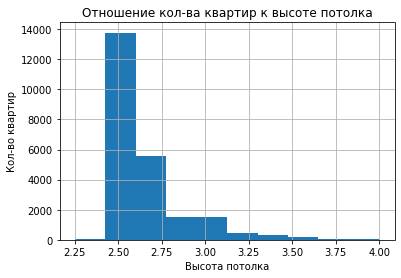

In [82]:
ax = data['ceiling_height'].plot(
    kind='hist', 
    bins=10, 
    range=(2.25,4), 
    title='Отношение кол-ва квартир к высоте потолка', 
    grid=True
)
ax.set_xlabel('Высота потолка')
ax.set_ylabel('Кол-во квартир')

Присутствует значительный пик в районе 2.7 метров. Но вероятно это связанно с заполнением пропущенных значений медианными.

Text(0, 0.5, 'Кол-во квартир')

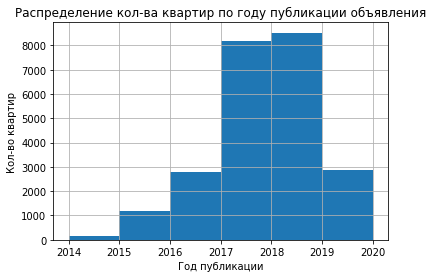

In [83]:
ax = data['year'].plot(
    kind='hist', 
    bins=6, 
    range=(2014,2020), 
    title='Распределение кол-ва квартир по году публикации объявления', 
    grid=True
)
ax.set_xlabel('Год публикации')
ax.set_ylabel('Кол-во квартир')

Text(0, 0.5, 'Кол-во квартир')

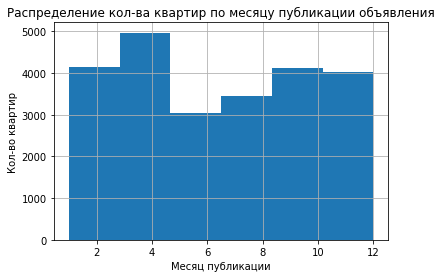

In [84]:
ax = data['month'].plot(
    kind='hist', 
    bins=6, 
    title='Распределение кол-ва квартир по месяцу публикации объявления', 
    grid=True
)
ax.set_xlabel('Месяц публикации')
ax.set_ylabel('Кол-во квартир')

Text(0, 0.5, 'Кол-во квартир')

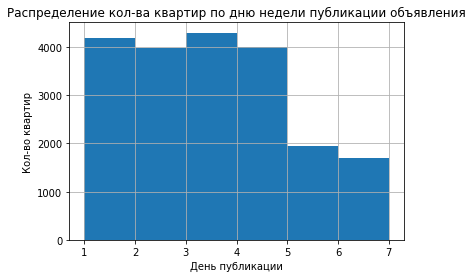

In [85]:
ax = data['day'].plot(
    kind='hist', 
    bins=6,
    range = (1,7),
    title='Распределение кол-ва квартир по дню недели публикации объявления', 
    grid=True
)
ax.set_xlabel('День публикации')
ax.set_ylabel('Кол-во квартир')

Распределение по дате публикации объявлений анамалий не выяляет. 
Наибольшее количество объявлений зарегистрировано в 2017-2018 годах вероятно это связано с ростом популярности сервиса, тогда как в 2019 году объявлений значительно меньше, вероятно выгрузка была сделана в первой половине 2019 года.

По месяцам распределение примерно одинаковое.

По дням недели есть небольшой спад в выходные дни, что вполне объяснимо стремлением риэлторов посвятить выходные показам квартир, а не заполнением объявлением.

#### Изучение сроков продажи квартиры

In [86]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [87]:
data['days_exposition'].mean(), data['days_exposition'].median()

(180.88863436982163, 95.0)

In [88]:
data['days_exposition'].quantile(0.1), data['days_exposition'].quantile(0.25), data['days_exposition'].quantile(0.75)

(17.0, 45.00000000000001, 232.0)

Text(0, 0.5, 'Кол-во квартир')

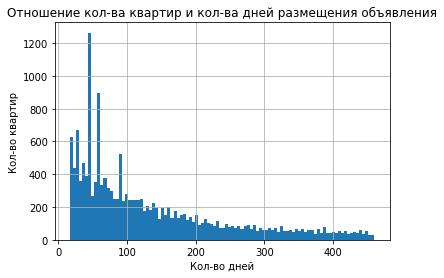

In [89]:
ax = data['days_exposition'].plot(
    kind='hist', 
    bins=100, 
    range=(17,460), 
    title='Отношение кол-ва квартир и кол-ва дней размещения объявления', 
    grid=True
)
ax.set_xlabel('Кол-во дней')
ax.set_ylabel('Кол-во квартир')

На графики видно, что большая часть квартир продаются за 100 дней. Так же присутствует пик продаж в районе 45-65 дней.

Сверх быстрой продажей можно считать менее 17 дней. Только 10% квартир продаются быстрее.

Быстрой продажей можно считать менее 45 дней. Только 25% квартир продаются быстрее.

Тогда как необычно долгой можно считать более 232 дня. Только 75% квартир продаются быстрее этого срока. 

#### Определение факторов оказывающих влияние на общую (полную) стоимость объекта

In [90]:
data[['last_price', 
      'total_area', 
      'living_area', 
      'kitchen_area', 
      'rooms',
      'ceiling_height',
      'first_floor',
      'last_floor',
      'other_floor',
      'day', 
      'month',
      'year',
      'm2_price',
      'cityCenters_nearest_km'
     ]].corr()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,first_floor,last_floor,other_floor,day,month,year,m2_price,cityCenters_nearest_km
last_price,1.000000,0.653654,0.556293,0.451481,0.364817,0.074077,-0.059810,0.029281,0.020151,0.001550,0.002779,-0.043089,0.734444,-0.206995
total_area,0.653654,1.000000,0.909281,0.584222,0.759612,0.094236,-0.042420,0.054837,-0.012279,-0.004639,0.004925,-0.080544,0.298505,-0.231269
living_area,0.556293,0.909281,1.000000,0.424321,0.855685,0.094822,-0.012243,0.067545,-0.044744,-0.006368,-0.000603,-0.074354,0.209014,-0.226138
kitchen_area,0.451481,0.584222,0.424321,1.000000,0.277556,0.072741,-0.085788,-0.011350,0.072321,-0.011368,0.003968,-0.057358,0.361642,-0.184488
rooms,0.364817,0.759612,0.855685,0.277556,1.000000,0.063460,0.025690,0.061117,-0.067327,-0.003612,-0.002930,-0.055104,0.053898,-0.186200
ceiling_height,0.074077,0.094236,0.094822,0.072741,0.063460,1.000000,-0.011891,0.018948,-0.006493,-0.012807,-0.004641,0.010853,0.105338,-0.079444
first_floor,-0.059810,-0.042420,-0.012243,-0.085788,0.025690,-0.011891,1.000000,-0.144365,-0.620197,-0.002345,-0.012658,-0.013090,-0.130113,0.061825
last_floor,0.029281,0.054837,0.067545,-0.011350,0.061117,0.018948,-0.144365,1.000000,-0.682954,0.008403,-0.000074,-0.006740,-0.049794,0.016390
other_floor,0.020151,-0.012279,-0.044744,0.072321,-0.067327,-0.006493,-0.620197,-0.682954,1.000000,-0.005109,0.009586,0.015610,0.133540,-0.056154
day,0.001550,-0.004639,-0.006368,-0.011368,-0.003612,-0.012807,-0.002345,0.008403,-0.005109,1.000000,0.011496,-0.004799,-0.007371,0.008685


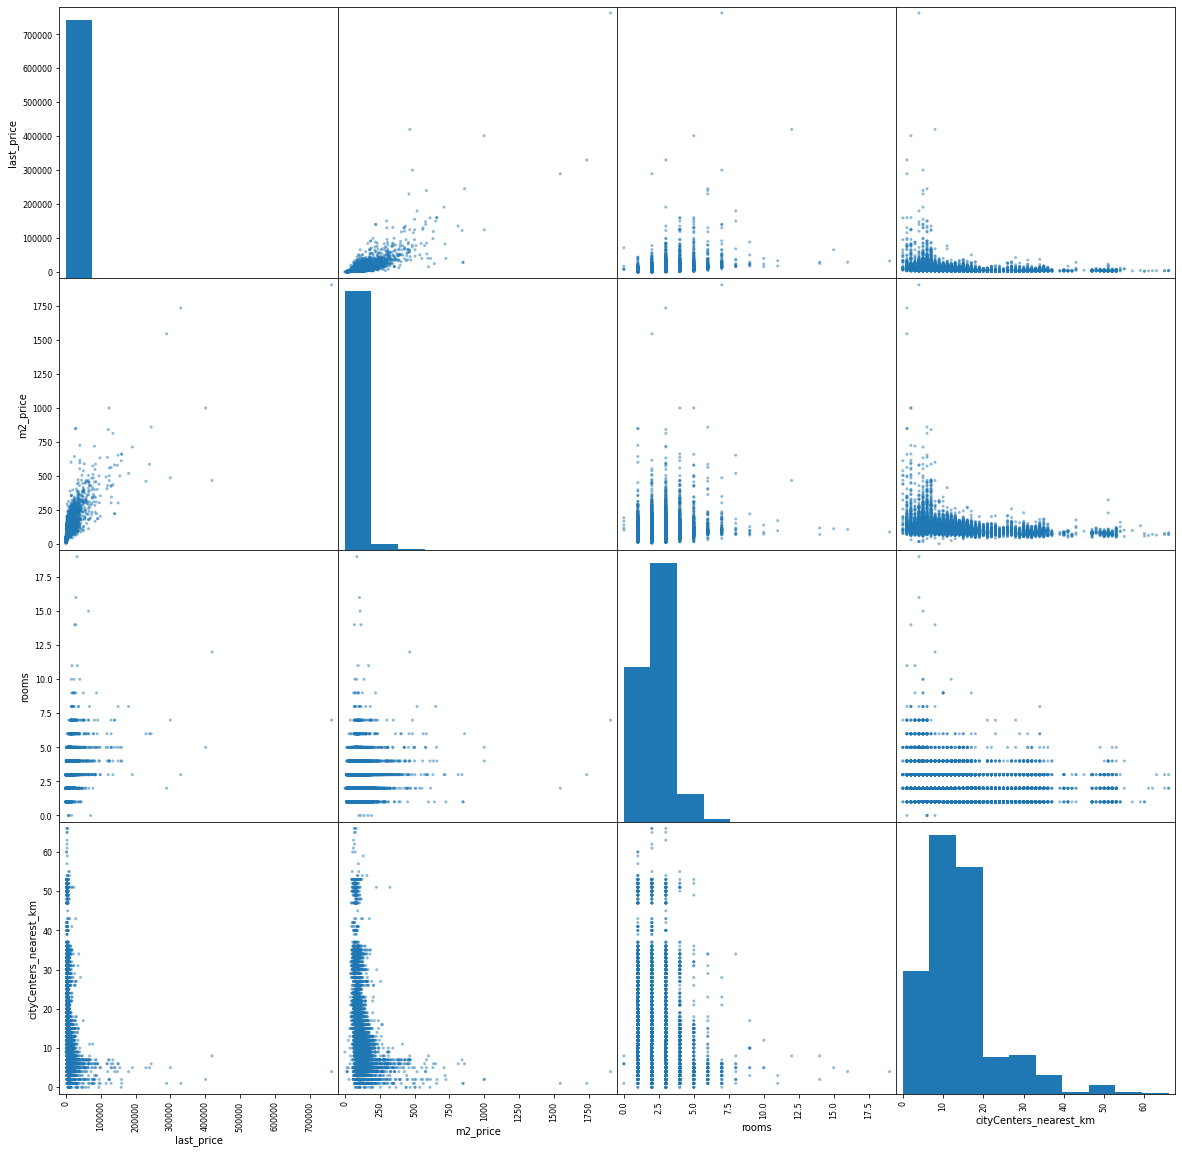

In [91]:
pd.plotting.scatter_matrix(data[['last_price', 
                                 'm2_price', 
                                 'rooms', 
                                 'cityCenters_nearest_km',
                                 ]], figsize=(20,20));

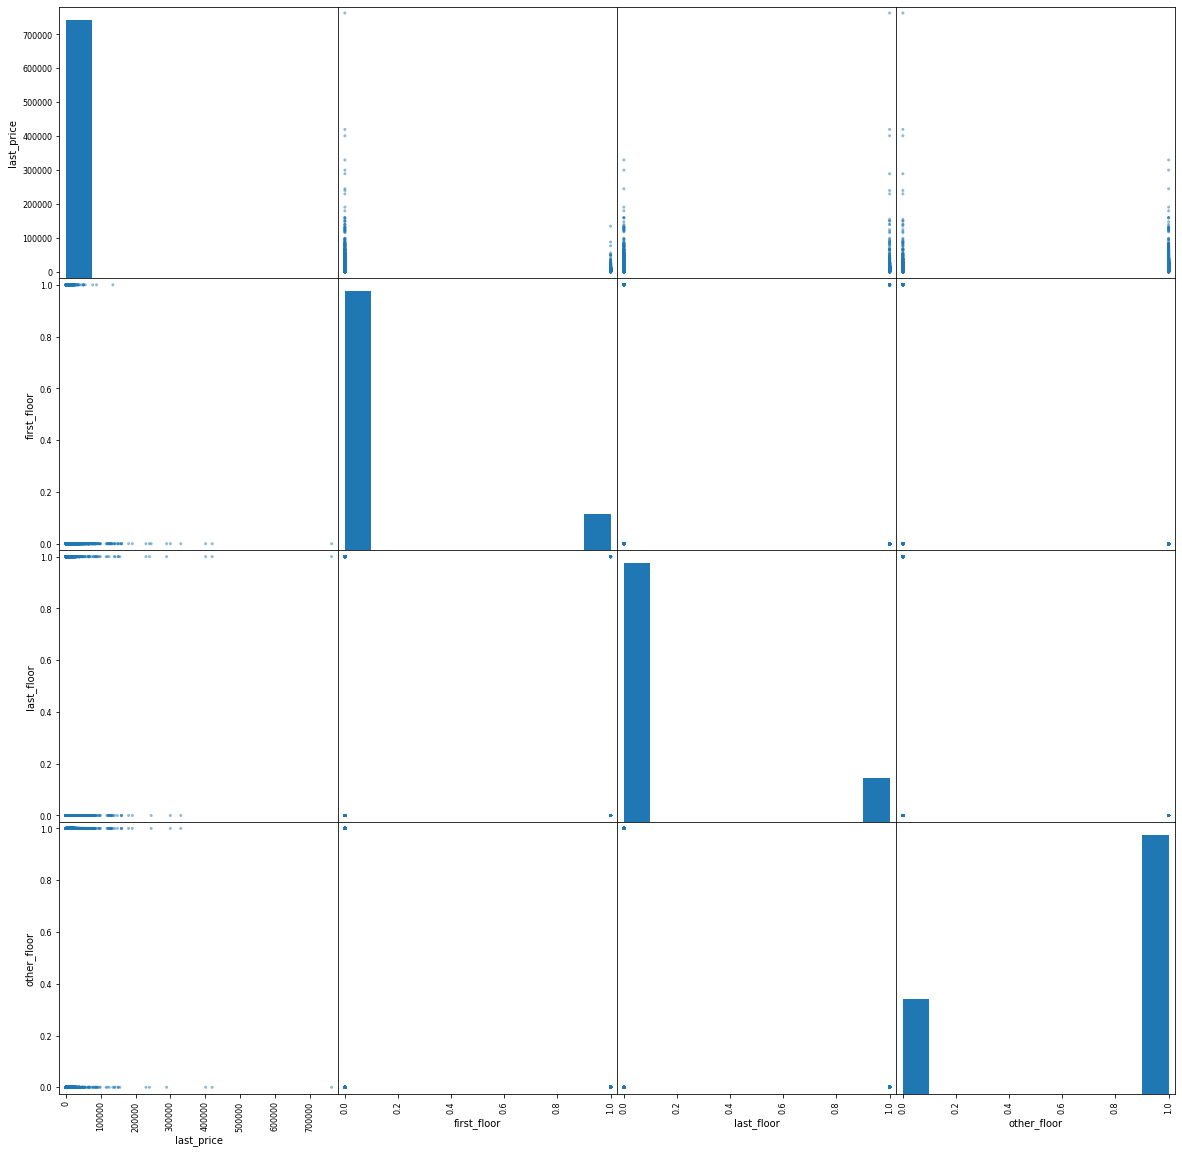

In [92]:
pd.plotting.scatter_matrix(data[['last_price',
                                 'first_floor',
                                 'last_floor',
                                 'other_floor'
                                ]], figsize=(20,20));

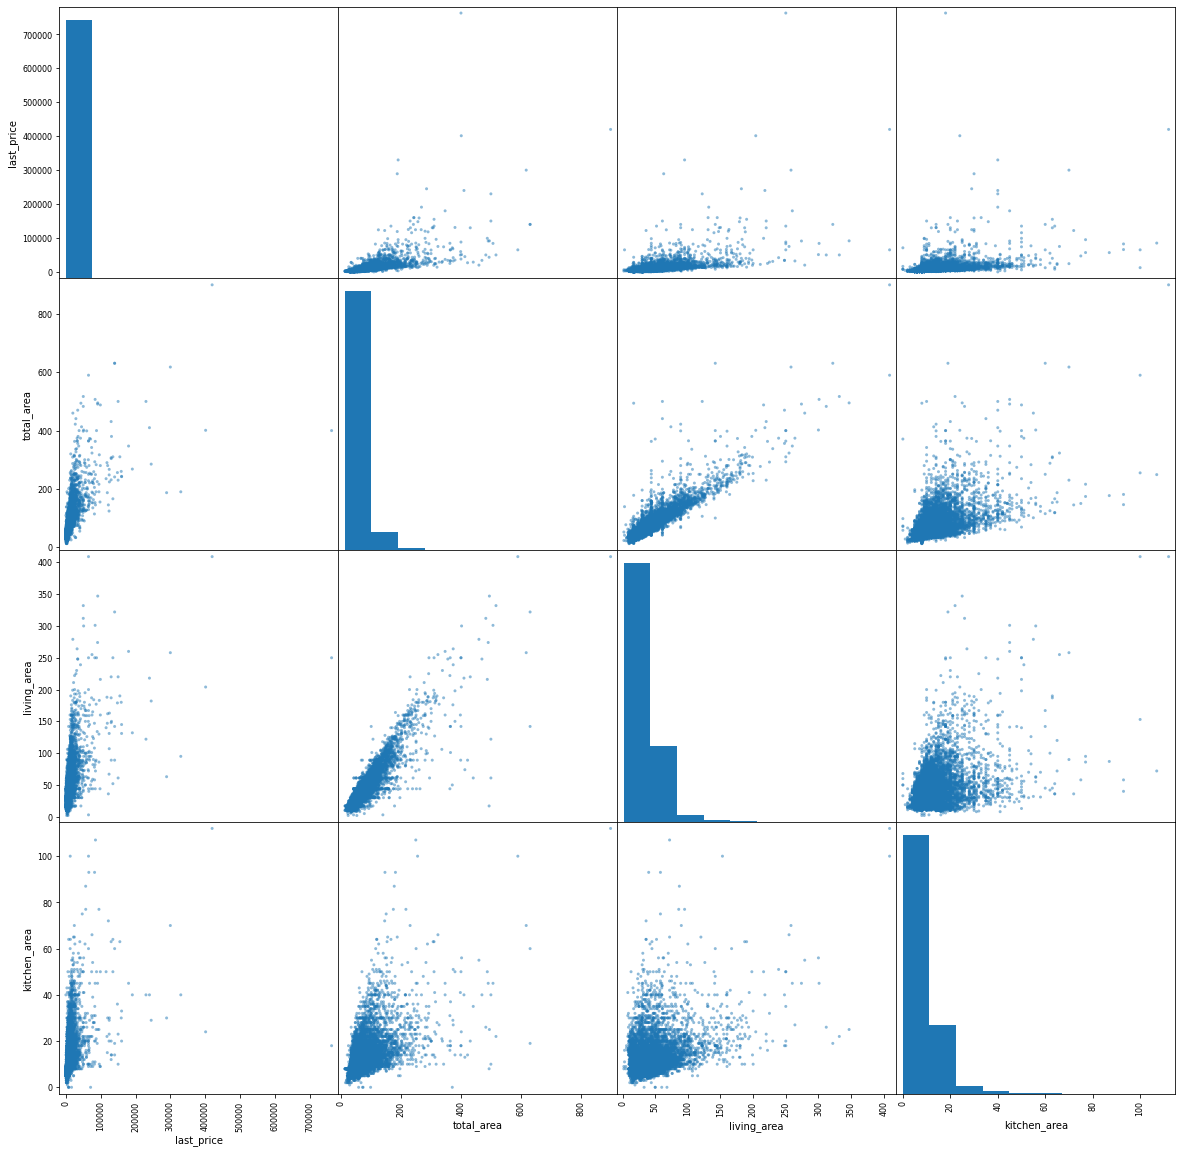

In [93]:
pd.plotting.scatter_matrix(data[['last_price',
                                 'total_area',
                                 'living_area',
                                 'kitchen_area',
                                 ]], figsize=(20,20));

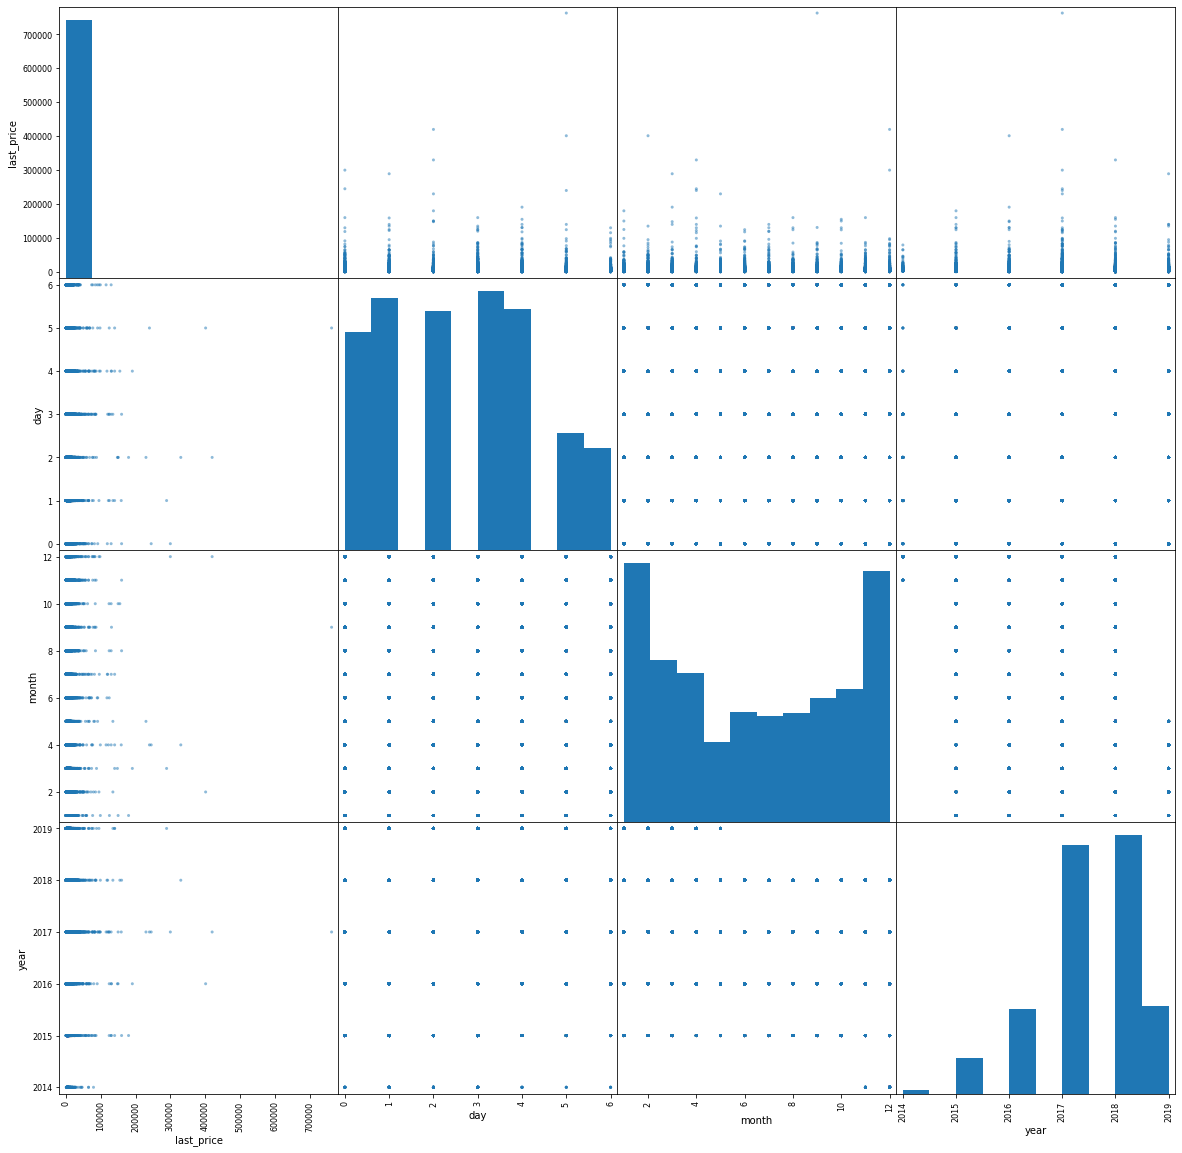

In [94]:
pd.plotting.scatter_matrix(data[['last_price', 
                                 'day', 
                                 'month', 
                                 'year'
                                ]], figsize=(20,20));

Основное влияние на стоимость квартиры оказывает общая площадь и параметры которые напрямую зависят от нее. А именно, количество комнат, площадь кухни, желлая площадь. Соответсвенно, чем больше квартира тем она дороже.

В свою очередь, удаленность от центра отрицательно влияет на стоимость квартиры, чем меньше расстояние тем квартиры дороже.

Высота этажа влияет только в случае с первым этажем. Квартиры на первом этаже наименее привлекательны для жилья, поэтому стоят дешевле. 

Дата публикации объявления никак не влияет на стоимость квартиры. 

#### Рассчет времени продажи квартиры на первом этаже.

In [104]:
first_floar = data.groupby(['first_floor'])['days_exposition'].median()
first_floar = first_floar.to_frame()
first_floar

,days_exposition
first_floor,
0,93.0
1,115.0


Медианное время продажи квартир на 1 этаже немного меньше чем, на остальных этажах 93 против 115. Вероятно на это влияет меньшая стоимость.

#### Рассчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [103]:
#рассчет средней цены км. м в 10 населенных пунктов с наибольшим числом объявлений
local_top = data['locality_name'].value_counts().head(10)
price = data.pivot_table(index='locality_name', values='m2_price').round()
best_ten = price.merge(local_top,  how='right', left_index=True, right_index=True)
best_ten.sort_values(by='m2_price', ascending=False)

,m2_price,locality_name
Санкт-Петербург,115.0,15721
Пушкин,103.0,369
деревня Кудрово,93.0,299
посёлок Парголово,90.0,327
посёлок Мурино,86.0,522
посёлок Шушары,79.0,440
Колпино,75.0,338
Гатчина,69.0,307
Всеволожск,68.0,398
Выборг,58.0,237


Наибольшее воличество объявлений ожидаемо в самом больщом городе Санкт-Петербург 15721 объявление со средней стоимостью квадратного метра 115 000 руб. 

Из 10 населенных пунктов с наибольшим количеством объявлений в г. Выборг 237 объявлений со средней стоимостью квадратного метра 58 000 руб. 

#### Определение средней цены каждого километра удаленности от центра Санкт-Петербурга

In [99]:
# рассчет миданной стоимости квартир относительно каждого км удаленности от центра
m2_from_center = data.groupby(['cityCenters_nearest_km'])['m2_price'].median()
m2_from_center = m2_from_center.to_frame()
m2_from_center['cityCenters_nearest_km'] = m2_from_center.index
m2_from_center.head(21)

,m2_price,cityCenters_nearest_km
cityCenters_nearest_km,,
0.0,175.0,0.0
1.0,128.0,1.0
2.0,123.0,2.0
3.0,109.0,3.0
4.0,117.5,4.0
5.0,127.0,5.0
6.0,131.5,6.0
7.0,127.0,7.0
8.0,123.0,8.0


<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='m2_price'>

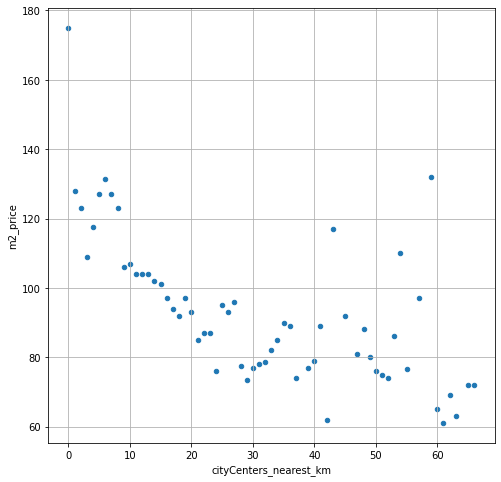

In [98]:
m2_from_center.plot.scatter(x='cityCenters_nearest_km', y='m2_price', grid=True, figsize=(8,8))

Протяженность Санкт-Петербурга с с севера на юг в пределах КАД — 32 км., с северо-запада на юго-восток за пределами КАД, — около 90 км. Но так как большую часть данной площади составляет финский залив, рассматривать примим максимальное расстояние до цента равным 20 км.
Данные подтверждаю логичный вывод, что цена недвижимости ростет с уменьшением расстояния до центра города. Медианная стоимость одного квадратного метра в самом центре 173 000 руб., тогда как в 20 км от центра уже 92 000 руб.

### Общий вывод

Больше всего влияет на цену - близость к центру, после по уменьшению влияния: кол-во комнат, этаж, высота потолка.

Чем ближе к центру тем дороже квартира.

Медианная стоимость одного квадратного метра в самом центре 173 000 руб., тогда как в 20 км от центра уже 92 000 руб.

Большим спросом пользуются квартиры которые не расположены на первом и последнем этаже, так же этот факт больше влияет на цену. 
Но за счет меньшей цены они немного быстрее продаются. Медианное время продажи квартир на 1 этаже немного меньше чем, на остальных этажах 93 против 115.

Большая часть квартир продаются за 100 дней. Так же присутствует пик продаж в районе 45-65 дней.

* Сверх быстрой продажей можно считать менее 17 дней. Только 10% квартир продаются быстрее.
* Быстрой продажей можно считать менее 45 дней. Только 25% квартир продаются быстрее.
* Тогда как необычно долгой можно считать более 232 дня. Только 75% квартир продаются быстрее этого срока. 

Наибольшее воличество объявлений ожидаемо в самом больщом городе Санкт-Петербург 15721 объявление со средней стоимостью квадратного метра 115 000 руб. 

Из 10 населенных пунктов с наибольшим количеством объявлений в г. Выборг 237 объявлений со средней стоимостью квадратного метра 58 000 руб. 